In [2]:
import numpy as np
data = np.loadtxt('data3.txt')
X = data[:,:-1]
Y = data[:,-1]

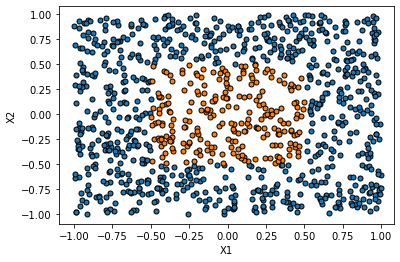

In [3]:
import matplotlib.pyplot as plt
plt.scatter(*X[Y==0].T, s=25, marker="o", alpha=1, edgecolors="k")
plt.scatter(*X[Y==1].T, s=25, marker="o", alpha=1, edgecolors="k")
plt.xlabel("X1")
plt.ylabel("X2")
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X,Y)

DecisionTreeClassifier(random_state=0)

In [5]:
from graphviz import Digraph

ModuleNotFoundError: No module named 'graphviz'

In [6]:
#!pip install graphviz

     |████████████████████████████████| 46 kB 395 kB/s eta 0:00:01


In [7]:
from graphviz import Digraph

In [12]:
import graphviz
from sklearn import tree
#columns=list(trainX.columns)
dot_data = tree.export_graphviz(clf,out_file=None,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open("classifiers/classifier.txt","w+")
f.write(dot_data)
f.close()

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

zsh:1: command not found: dot
